# Understanding Autoencoders

## Working with an autoencoder example

### Obtain the Fashion-MNIST dataset

In [1]:
from tensorflow.keras.datasets \
    import fashion_mnist
import matplotlib.pyplot as plt

In [2]:
(x_train, _), (x_test, _) = \
    fashion_mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

print (x_train.shape)
print (x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [3]:
def showFigures(dataset, 
                n_items=10, 
                title="Test"):
    fig, axs = plt.subplots(
        1, n_items, 
        constrained_layout=True)
    fig.suptitle(title, y=0.65, 
                 fontsize=16,)
    for i in range(n_items):
        plt.gray()
        axs[i].imshow(dataset[i])
        axs[i].get_xaxis().set_visible(False)
        axs[i].get_yaxis().set_visible(False)
    plt.show()

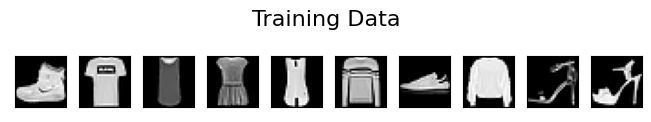

In [4]:
showFigures(x_train, title="Training Data")

### Build an encoder

In [5]:
from tensorflow.keras import layers
from tensorflow import keras
import tensorflow as tf
import numpy as np

In [6]:
x_train = x_train.reshape((
    len(x_train), 
    np.prod(x_train.shape[1:])))
x_test = x_test.reshape((
    len(x_test), 
    np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [7]:
encoder_inputs = keras.Input(shape=(784,))
encoded = layers.Dense(
    128, 
    activation="relu")(encoder_inputs)
encoded = layers.Dense(
    64, activation="relu")(encoded)
encoded = layers.Dense(
    32, activation="relu")(encoded)

### Build a decoder

In [8]:
decoded = layers.Dense(64, activation="relu")(encoded)
decoded = layers.Dense(128, activation="relu")(decoded)
decoded = layers.Dense(784, activation="sigmoid")(decoded)

### Build the autoencoder

In [9]:
autoencoder = keras.Model(encoder_inputs, decoded)
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 64)                2112      
                                                                 
 dense_4 (Dense)             (None, 128)               8320      
                                                                 
 dense_5 (Dense)             (None, 784)               101136

In [10]:
autoencoder.compile(optimizer='adam', 
                    loss='binary_crossentropy')

In [11]:
encoder = keras.Model(encoder_inputs, 
                      encoded, name="encoder")
print(encoder.summary())

Model: "encoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
Total params: 110,816
Trainable params: 110,816
Non-trainable params: 0
_________________________________________________________________
None


In [12]:
encoded_input = keras.Input(shape=(32,))
decoder_layer_1 = \
    autoencoder.layers[-3](encoded_input)
decoder_layer_2 = \
    autoencoder.layers[-2](decoder_layer_1)
decoder_layer_3 = \
    autoencoder.layers[-1](decoder_layer_2)
decoder = keras.Model(encoded_input, 
                      decoder_layer_3, 
                      name="decoder")
print(decoder.summary())

Model: "decoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32)]              0         
                                                                 
 dense_3 (Dense)             (None, 64)                2112      
                                                                 
 dense_4 (Dense)             (None, 128)               8320      
                                                                 
 dense_5 (Dense)             (None, 784)               101136    
                                                                 
Total params: 111,568
Trainable params: 111,568
Non-trainable params: 0
_________________________________________________________________
None


### Create and train a model from the encoder and decoder

In [13]:
from keras.callbacks import TensorBoard

In [14]:
%load_ext tensorboard

In [15]:
autoencoder.fit(
    x_train, x_train,
    epochs=50,
    batch_size=256,
    shuffle=True,
    validation_data=(x_test, x_test),
    callbacks=[TensorBoard(log_dir='autoencoder')])

Epoch 1/50
235/235 [==============================] - 7s 14ms/step - loss: 0.3796 - val_loss: 0.3192
Epoch 2/50
235/235 [==============================] - 3s 11ms/step - loss: 0.3105 - val_loss: 0.3075
Epoch 3/50
235/235 [==============================] - 3s 12ms/step - loss: 0.3023 - val_loss: 0.3025
Epoch 4/50
235/235 [==============================] - 2s 11ms/step - loss: 0.2977 - val_loss: 0.2998
Epoch 5/50
235/235 [==============================] - 2s 9ms/step - loss: 0.2946 - val_loss: 0.2953
Epoch 6/50
235/235 [==============================] - 2s 10ms/step - loss: 0.2922 - val_loss: 0.2930
Epoch 7/50
235/235 [==============================] - 2s 9ms/step - loss: 0.2901 - val_loss: 0.2913
Epoch 8/50
235/235 [==============================] - 2s 10ms/step - loss: 0.2885 - val_loss: 0.2900
Epoch 9/50
235/235 [==============================] - 2s 9ms/step - loss: 0.2873 - val_loss: 0.2894
Epoch 10/50
235/235 [==============================] - 2s 9ms/step - loss: 0.2863 - val_loss: 

### Obtaining and graphics model statistics

In [16]:
%tensorboard --logdir 'autoencoder'

### Testing the model

In [17]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

313/313 [==============================] - 1s 2ms/step


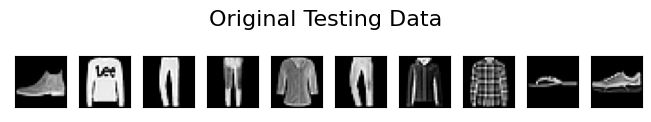

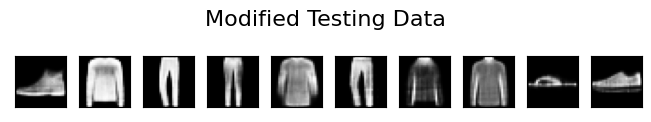

In [19]:
showFigures(x_test.reshape(10000,28,28), 
            title="Original Testing Data")
showFigures(decoded_imgs.reshape(10000,28,28),
            title="Modified Testing Data")

### Seeing the effect of bad data

In [20]:
from tensorflow.keras.datasets import mnist

In [21]:
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

print (x_train.shape)
print (x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [22]:
x_train = x_train.reshape((
    len(x_train), 
    np.prod(x_train.shape[1:])))
x_test = x_test.reshape((
    len(x_test), 
    np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [23]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

313/313 [==============================] - 1s 2ms/step


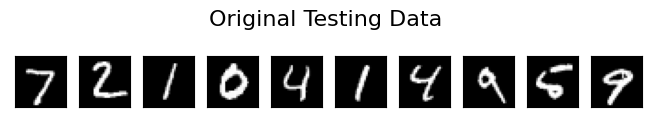

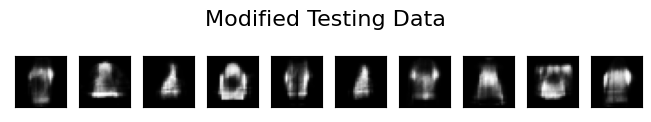

In [24]:
showFigures(x_test.reshape(10000,28,28), 
            title="Original Testing Data")
showFigures(decoded_imgs.reshape(10000,28,28), 
            title="Modified Testing Data")